# Aula Experimental - <i>Beta Hedging</i>

## Regressão - Modelo de Fatores

<p>O modelo de fatores nada mais é do que executar uma regressão do retorno de certo ativo que desejamos modelar com alguma(s) variável(is) de mercado. Estas variáveis podem ser inúmeras, inclusive outros ativos ou outros indexadores.</p>

<p>O modelo matemático da regressão linear é uma combinação linear dos retornos das variáveis explicativas selecionadas, como pode-se ver a seguir:</p>

$$Y = \alpha + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n$$

## O que, então, é o <i>Beta</i>?

<p>O <i>beta</i> de um ativo/indexador com relação a outro é simplesmente o $\beta$ da equação acima. Vamos ver um exemplo:</p>

<p>Se fizermos uma regressão linear, segundo o modelo acima, da ação de <b>PETR4</b> contra o <b>IBOVESPA</b> - teríamos o seguinte modelo: $Y_{PETR4} = \alpha + \beta X_{IBOVESPA}$ e o <i>beta</i> seria exatamente o $\beta$ que está multiplicando os retornos do <b>IBOVESPA</b>.</p>

<p>Por outro lado, se fizermos uma regressão linear onde desejamos explicar os retornos de <b>PETR4</b> usando os retornos do <b>IBOVESPA</b> e os retornos de <b>PRIO3</b>, teríamos o seguinte modelo: $Y_{PETR4} = \alpha + \beta_1 X_{IBOVESPA} + \beta_2 X_{PRIO3}$. Agora temos dois <i>betas</i> distintos, um com relação ao <b>IBOVESPA</b> e outro com relação a <b>PRIO3</b>.</p>

<p>Frequentemente o termo <i>beta</i> se refere à exposição do ativo com relação ao <b>IBOVESPA</b>, pois considera-se que este indexador representa o mercado de forma mais fidedigna, logo, este <i>beta</i> mostra o quanto do retorno do ativo é explicado pelo retorno de mercado.</p>

## <i>Okay</i>, mas para quê serve o <i>Beta</i>?

<p>Um fundo de ações, por exemplo, cobra taxas de administração e performance sobre o patrimônio do fundo e quem paga estas taxas é o investidor. Por que o investidor iria querer um fundo que apenas produz <i>beta</i>, dado que ele pode obter este mesmo retorno investindo passivamente no índice? Os melhores gestores conseguem gerar apenas <i>alfa</i> para seus investidores, ou seja, geram retornos que não dependem do mercado. Se o índice (mercado) estiver subindo ou descendo, o gestor consegue ter consistência na sua geração de valor.</p>

## Vamos agora ao Código

In [2]:
# Importando as bibliotecas
import math
import numpy                as     np
import pandas               as     pd
import statsmodels.api      as     sm
import matplotlib.pyplot    as     plt
import yahoo_fin.stock_info as     yf # http://theautomatic.net/yahoo_fin-documentation/
from   statsmodels          import regression

In [3]:
# Criando uma função que irá buscar as séries históricas dos ativos aqui utilizados
# Esta busca será feita na base de dados disponibilizada pelo Yahoo Finance através da biblioteca deles.

def get_pricing(ticker, start_date=None, end_date=None, fields=None):
    df = pd.DataFrame()
    
    if ((fields == 'price') | (fields == 'Price')):
        fields = 'close'
    
    if isinstance(ticker, list):
        if start_date == None:
            if end_date == None:
                for i in ticker:
                    aux = yf.get_data(i)
                    if fields != None:
                        aux = aux[[fields]]
                    else:
                        aux = aux[['close']]
                    aux.columns=[i]
                    df = pd.concat([df, aux], axis=1)
            else:
                for i in ticker:
                    aux = yf.get_data(i, end_date=end_date)
                    if fields != None:
                        aux = aux[[fields]]
                    else:
                        aux = aux[['close']]
                    aux.columns=[i]
                    df = pd.concat([df, aux], axis=1)
        else:
            for i in ticker:
                aux = yf.get_data(i, start_date=start_date, end_date=end_date, interval='1d')
                if fields != None:
                    aux = aux[[fields]]
                else:
                    aux = aux[['close']]
                aux.columns=[i]
                df = pd.concat([df, aux],axis=1)
        
    else:
        if start_date == None:
            if end_date == None:
                df = yf.get_data(ticker)
            else:
                df = yf.get_data(ticker, end_date=end_date)
        else:
            df = yf.get_data(ticker, start_date=start_date, end_date=end_date, interval='1d')

        if fields != None:
            df = df[[fields]]

        df = df[['close']]
        df.columns=[ticker]
        
    return df

# Exemplo de chamada da função
inicio = '2014-01-01'
fim = '2015-01-01'
ticker='TSLA'
benchmark = 'SPY'
ativo = get_pricing(ticker, fields='close', start_date=inicio, end_date=fim)
benchmk = get_pricing(benchmark, fields='close', start_date=inicio, end_date=fim)

In [5]:
# ativo.head(5)
benchmk.head(5)

,SPY
2014-01-02,182.919998
2014-01-03,182.889999
2014-01-06,182.360001
2014-01-07,183.479996
2014-01-08,183.520004


In [6]:
# Vamos agora calcular os retornos destes ativos e vamos jogar o primeiro elemento fora
# É necessário jogar o primeiro elemento fora, pois ele será "NaN" devido ao fato de o primeiro retorno ser perdido pela falta de um dado anterior
r_a = ativo.pct_change()[1:]
r_b = benchmk.pct_change()[1:]

In [9]:
r_a.head(5)
# r_b.head(5)

,TSLA
2014-01-03,-0.003598
2014-01-06,-0.017117
2014-01-07,0.016054
2014-01-08,0.012855
2014-01-09,-0.024788


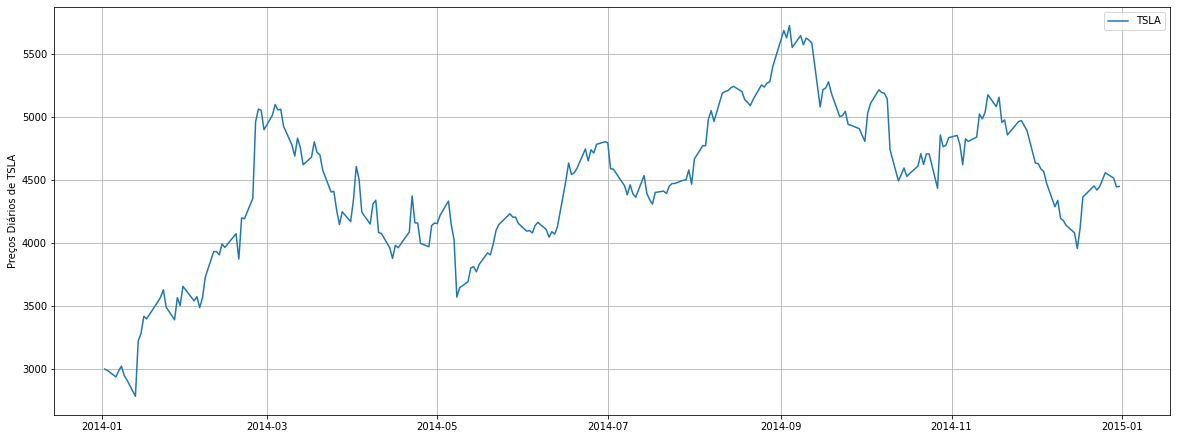

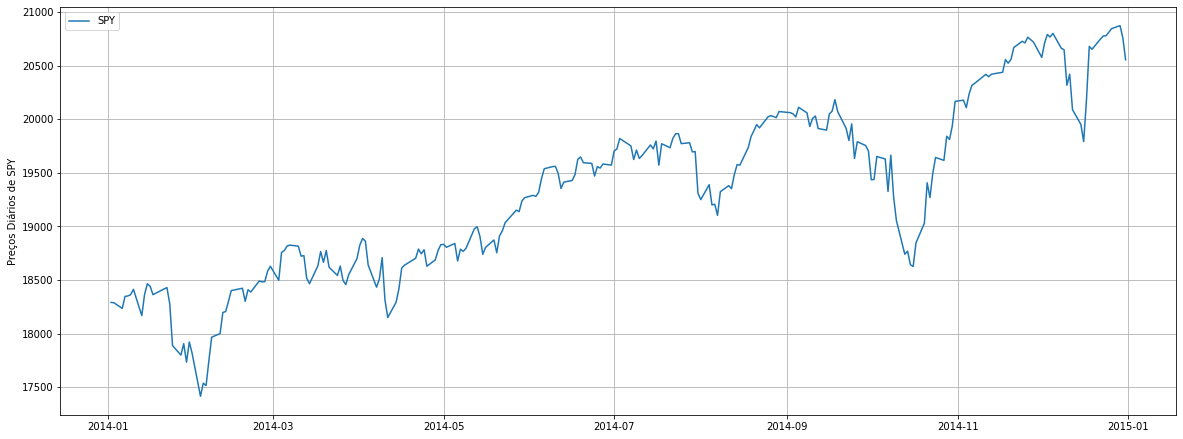

In [10]:
# Plotando ambas as séries temporais de retornos apenas para visualização

plt.figure(figsize=(20,7.5))
plt.plot(ativo*100)
plt.ylabel(f'Preços Diários de {ticker}')
plt.legend([ticker])
plt.grid(b='True')
plt.show();

plt.figure(figsize=(20,7.5))
plt.plot(benchmk*100)
plt.ylabel(f'Preços Diários de {benchmark}')
plt.legend([benchmark])
plt.grid(b='True')
plt.show();

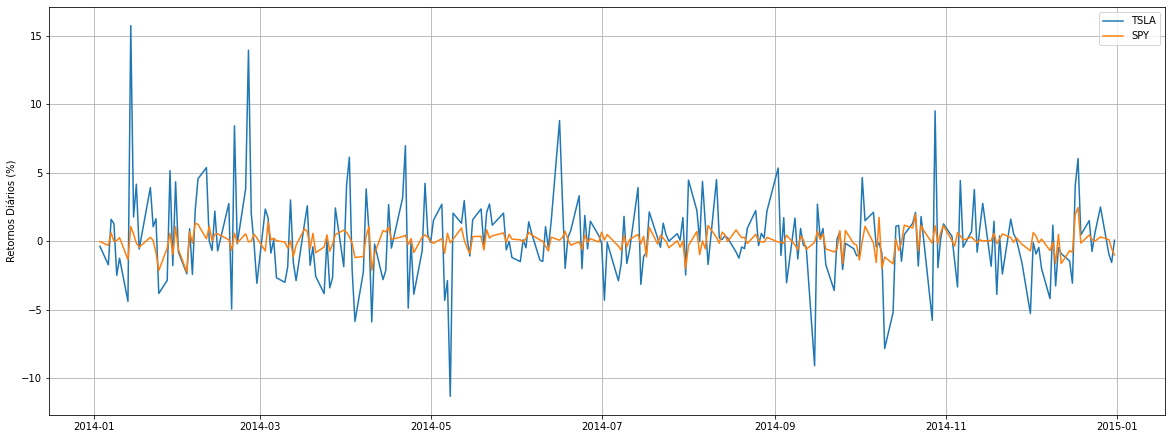

In [11]:
# Plotando ambas as séries temporais de retornos apenas para visualização

plt.figure(figsize=(20,7.5))
plt.plot(r_a*100)
plt.plot(r_b*100)
plt.ylabel('Retornos Diários (%)')
plt.legend([r_a.columns[0], r_b.columns[0]])
plt.grid(b='True')
plt.show();

In [12]:
# Agora vamos executar a regressão linear para estimarmos os parâmetros alfa e beta

X = r_b.values # Pegando apenas os valores, sem os índices (datas)
Y = r_a.values

def linreg(x,y):
    # Adiciona-se uma constante para que possamos "fittar" também um intercepto (que será nosso alfa) no modelo
    # O comando abaixo apenas adiciona uma coluna de 1s nos dados
    x = sm.add_constant(x)
    modelo = regression.linear_model.OLS(y,x).fit()
    # Removendo a constante agora que já estimamos a regressão
    x = x[:, 1]
    return modelo.params[0], modelo.params[1]

alfa, beta = linreg(X,Y)
print('alfa: ' + str(round(alfa, 4)))
print('beta: ' + str(round(beta, 4)))

alfa: 0.0011
beta: 1.9534


In [13]:
# Hipótese nula -> A regressão não é válida
# Com p-value baixo (abaixo de 0,05 usualmente), podemos considerar que a regressão é preditiva

regression.linear_model.OLS(Y,sm.add_constant(X)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     64.79
Date:                Wed, 16 Feb 2022   Prob (F-statistic):           3.43e-14
Time:                        21:13:52   Log-Likelihood:                 549.38
No. Observations:                 251   AIC:                            -1095.
Df Residuals:                     249   BIC:                            -1088.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.002      0.620      0.536      -0.002       0.004
x1             1.9534      0.243      8.049      0.000       1.475       2.431
==============================================================================
Omnibus:                       64.336   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              377.056
Skew:                           0.853   Prob(JB):                     1.33e-82
Kurtosis:                       8.757   Cond. No.                         141.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

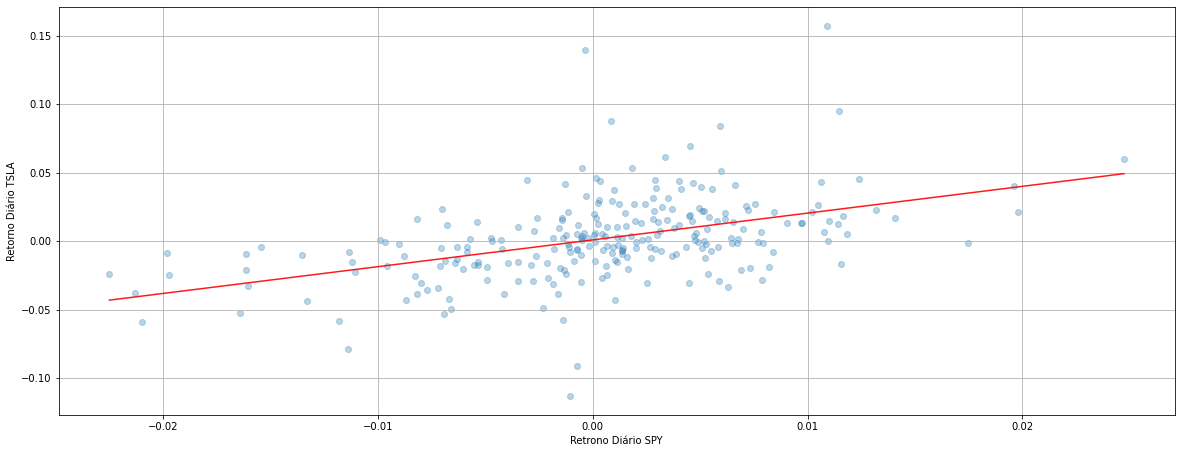

In [14]:
# Vamos plotar o modelo estimado Y = alfa + beta * X para vermos se ele estima bem os retornos dentro da amostra

X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * beta + alfa

plt.figure(figsize=(20,7.5))
plt.scatter(X, Y, alpha=0.3) # Plotando os dados de mercado
plt.xlabel("Retrono Diário "+benchmark)
plt.ylabel("Retorno Diário "+ticker)

# Adicionando a linha de regressão em vermelho
plt.plot(X2, Y_hat, 'r', alpha=0.9)
plt.grid(b='True')
plt.show()

## E se, ao invés de usarmos os retornos, usassemos os preços?

alfa: 156.2359
beta: 0.828


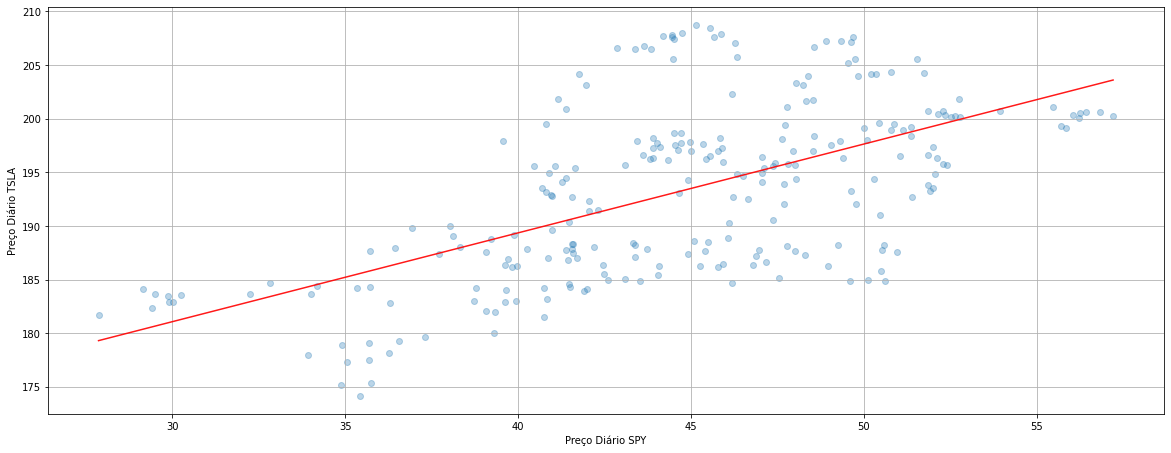

In [15]:
X_preco = ativo.values # Pegando apenas os valores, sem os índices (datas)
Y_preco = benchmk.values

def linreg(x,y):
    # Adiciona-se uma constante para que possamos "fittar" também um intercepto (que será nosso alfa) no modelo
    # O comando abaixo apenas adiciona uma coluna de 1s nos dados
    x = sm.add_constant(x)
    modelo = regression.linear_model.OLS(y,x).fit()
    # Removendo a constante agora que já estimamos a regressão
    x = x[:, 1]
    return modelo.params[0], modelo.params[1]

alfa_preco, beta_preco = linreg(X_preco,Y_preco)
print('alfa: ' + str(round(alfa_preco, 4)))
print('beta: ' + str(round(beta_preco, 4)))

# Vamos plotar o modelo estimado Y = alfa + beta * X para vermos se ele estima bem os retornos dentro da amostra

X2_preco = np.linspace(X_preco.min(), X_preco.max(), 100)
Y_hat_preco = X2_preco * beta_preco + alfa_preco

plt.figure(figsize=(20,7.5))
plt.scatter(X_preco, Y_preco, alpha=0.3) # Plotando os dados de mercado
plt.xlabel("Preço Diário "+benchmark)
plt.ylabel("Preço Diário "+ticker)

# Adicionando a linha de regressão em vermelho
plt.plot(X2_preco, Y_hat_preco, 'r', alpha=0.9)
plt.grid(b='True')
plt.show()

In [16]:
# Hipótese nula -> A regressão não é válida
# Com p-value baixo (abaixo de 0,05 usualmente), podemos considerar que a regressão é preditiva
0
regression.linear_model.OLS(Y_preco,sm.add_constant(X_preco)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     143.1
Date:                Wed, 16 Feb 2022   Prob (F-statistic):           2.21e-26
Time:                        21:16:47   Log-Likelihood:                -825.33
No. Observations:                 252   AIC:                             1655.
Df Residuals:                     250   BIC:                             1662.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        156.2359      3.118     50.115      0.000     150.096     162.376
x1             0.8280      0.069     11.964      0.000       0.692       0.964
==============================================================================
Omnibus:                        7.829   Durbin-Watson:                   0.042
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                8.137
Skew:                           0.427   Prob(JB):                       0.0171
Kurtosis:                       2.785   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<p>Idealmente queremos que a estatística de <i>Durbin-Watson</i> (Teste de autocorrelação)  esteja o mais próximo de 2 possível.O valor deste teste pode variar entre 0 e 4, e valores entre [0, 2) significam uma autocorrelação negativa, e valores entre (2, 4] significam uma autocorrelação positiva.</p>

<p>Na análise técnica, onde busca-se operar em cima de <i>momentum</i> e predições de curtíssimo prazo, a autocorrelação pode ser útil, porém, para a grande maioria dos casos em finanças quantitativas e análise de séries temporais, a autocorrelação é indesejável.</p>

<p>Um dos motivos de ser comum o uso dos retornos, é que eles tendem a eliminar a autocorrelação da série temporal, como pôde ser visto aqui.</p>

## O que é o <i>Beta Hedging</i> então?

<p>De forma mais genérica, o <i>beta</i> com relação ao mercado nos indica quanto de risco estamos expostos quando temos aquele ativo na carteira. Se um dado ativo tem uma alta exposição ao <i>beta</i> do mercado, então aquele ativo irá performar bem quando o mercado for bem e irá performar mal quando o mercado cair.</p>

<p>Usualmente, deseja-se encontrar estratégias que tenham o <i>beta</i> o mais próximo de zero, pois desta forma todo o retorno originado pela alocação irá vir do <i>alfa</i>, ou seja, o mercado indo bem ou mal a estratégia terá uma performance mais constante, menos volátil e independente do mercado. Isto configura uma proteção apra a carteira e apenas estratégias com <i>alfa</i> devem ser almejadas pelos investidores (o <i>beta</i> pode ser obtido passivamente investindo no mercado).</p>

## Gestão de Risco

<p>Na prática, a forma mais eficiente de gerir o risco do <i>portfolio</i> ao <i>beta</i> é fazendo seu <i>hedging</i>.</p>

### <i>Beta Hedging</i>

<p>Se definirmos que os retornos obtidos pela nossa estratégia têm a seguinte relação com os retornos do mercado:</p>

$$Y_{estrategia} = \alpha + \beta X_{IBOV}$$

<p>Então nós devemos operar vendidos (<i>short</i>) em <b>IBOV</b> na mesma proporção do <i>beta</i>, com o objetivo de cancelar este risco. A quantidade de posições vendidas em <b>IBOV</b> será, então, $-\beta \cdot Notional$.</p>

<p>Esta estratégia funciona pois, se nossos retornos podem ser aproximados por $\alpha + \beta X_{IBOV}$, então adicionar uma posição vendida em <b>IBOV</b> vai fazer com que nossos retornos se tornem $\alpha + \beta X_{IBOV} - \beta X_{IBOV} = \alpha$. Nossos retornos, agora, serão compostos apenas por <i>alfa</i>! A estratégia agora independe dos retornos do mercado (aqui representado pelo <b>IBOV</b>).</p>

### <i>Market Neutral</i>

<p>Quando uma estratégia apresenta, historicamente, um <i>beta</i> de zero consistentemente, chama-se esta estratégia de <i>market neutral</i>, ou seja, ela é neutra com relação ao mercado.</p>

### Problemas de Estimação

<p>Com o exposto acima, parece fácil obtermos uma estratégia composta puramente por <i>alfa</i>, porém o problema aqui é que o <i>beta</i> que foi estimado não irá necessariamente ficar constante naquele mesmo valor à medida que o tempo avança. Dado isto, a quantidade que ficamos vendidos em <b>IBOV</b> no período anterior não irá continuar zerando nosso <i>beta</i> em um período futuro. Na prática, é bastante difícil reduzir o <i>beta</i>para próximo de zero.</p>

<p>Na prática, deve-se rebalancear o <i>beta hedging</i> de forma a manter ele sempre o mais próximo de zero, porém o alto volume de negociações pode tornar o custo da estratégia bastante alto - o que faz com que outras formas de mitigar o risco de mercado sejam necessárias.</p>

## Implementando o <i>Beta Hedging</i>

<p>Agora que sabemos <b>como</b> executar este <i>hedge</i>, vamos aplicar ele no código e ver, na série histórica, o quanto ele vai afetar nossos retornos. Vamos contruir nossa estratégia simplesmente pegando o nosso <i>beta</i> com relação ao mercado e ponderando a posição vendida no mercado com $-\beta$ (negativo, pois estamos nos posicionando de forma oposta ao <i>beta</i> do <i>portfolio</i>).</p>

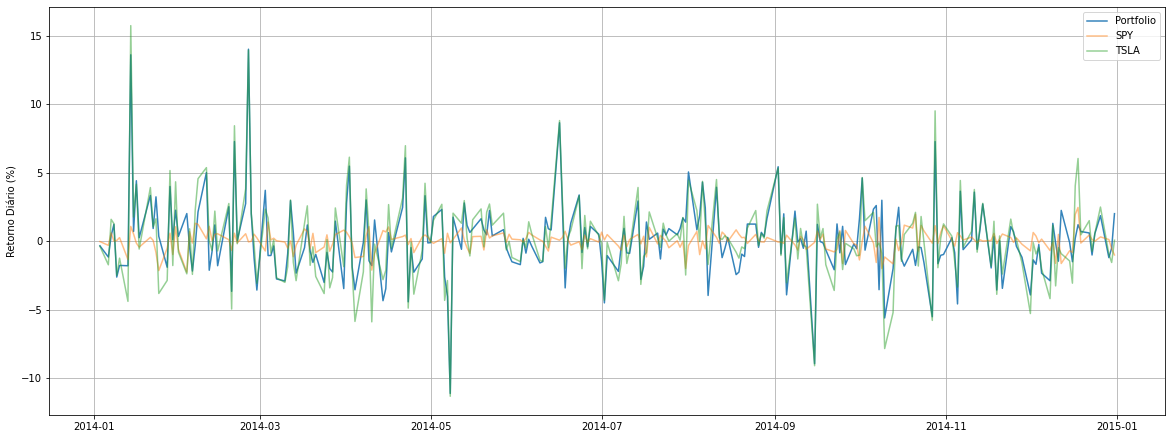

In [26]:
# Construindo o portfolio com o beta hedging
portfolio = -1*beta*r_b[benchmark] + r_a[ticker]
portfolio.name = ticker + " + Hedge"

# Plotando os retornos tanto do portfolio quanto do ativo em si (visto que o portfolio é composto apenas por este 1 ativo)
plt.figure(figsize=(20,7.5))
plt.set_cmap('viridis')
plt.plot(portfolio*100, alpha=0.9)
plt.plot(r_b*100, alpha=0.5)
plt.plot(r_a*100, alpha=0.5)
plt.ylabel("Retorno Diário (%)")
plt.legend(['Portfolio', benchmark, ticker])
plt.grid(b=True)
plt.show();

<p>Pelo que podemos ver, parece que a nossa estratégia está relativamente neutra com relação ao mercado e está replicando essencialmente o retorno do ativo escolhido.</p>

In [22]:
print("Médias: ", round(portfolio.mean(), 4), round(float(r_a.mean()), 4))#, round(float(r_b.mean()), 4))
print("Volatilidades: ", round(portfolio.std(), 4), round(float(r_a.std()), 4))#, round(float(r_b.std()), 4))

Médias:  0.0011 0.002
Volatilidades:  0.0272 0.0305


<p>Como podemos ver, a volatilidade foi reduzida ao custo de reduzirmos também o retorno. Vamos verificar a seguir que o <i>alfa</i> continua o mesmo, e o <i>beta</i> foi zerado.</p>

In [27]:
P = portfolio.values
alfa, beta = linreg(X,P)
print('alfa: ' + str(round(alfa, 4)))
print('beta: ' + str(round(beta)))

alfa: 0.0011
beta: 0


## Testando <i>Out-of-Sample</i>

<p>Note que nossa estratégia de <i>beta hedging</i> foi desenvolvida usando dados históricos de retornos tanto do ativo quanto do mercado (<b>IBOV</b>). Vamos agora verificar se esta estratégia de <i>beta hedging</i> continua sendo eficiente quando executamos a regressão em uma janela temporal, executamos o <i>beta hedging</i> e, então, verificamos a performance desta estratégia em períodos posteriores de tempo - sem rebalanceamento.</p>

Estimativa Histórica do Ativo:
alfa: 0.0011
beta: 1.9534

Estimativa do Ativo Fora da Amostra:
alfa: 0.0012
beta: 1.0364

Estratégia Fora da Amostra:
alfa: 0.0012
beta: -0.917



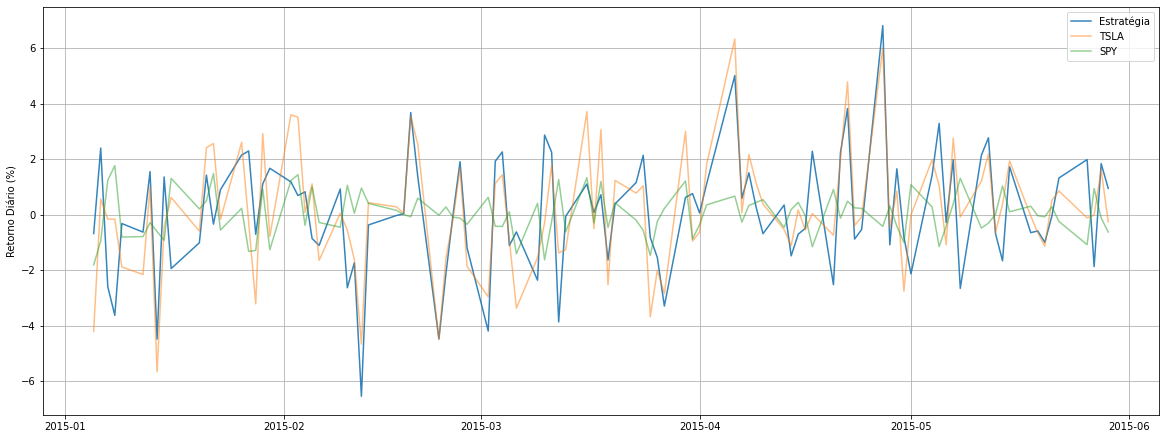

In [28]:
# Vamos calcular o alfa e o beta com dados históricos entre 2014 e 2015
inicio = '2014-01-01'
fim = '2015-01-01'
ativo = get_pricing(ticker, fields='close', start_date=inicio, end_date=fim)
benchmk = get_pricing(benchmark, fields='close', start_date=inicio, end_date=fim)
r_a = ativo.pct_change()[1:]
r_b = benchmk.pct_change()[1:]
X = r_b.values
Y = r_a.values
alfa_historico, beta_historico = linreg(X,Y)
print('Estimativa Histórica do Ativo:')
print('alfa: ' + str(round(alfa_historico, 4)))
print('beta: ' + str(round(beta_historico, 4)))
print()

# Buscando os dados de uma janela temporal diferente
inicio = '2015-01-01'
fim = '2015-06-01'
ativo = get_pricing(ticker, fields='close', start_date=inicio, end_date=fim)
benchmk = get_pricing(benchmark, fields='close', start_date=inicio, end_date=fim)

# Repetindo o processo de cálculo do alfa e do beta na segunda janela temporal
r_a = ativo.pct_change()[1:]
r_b = benchmk.pct_change()[1:]
X = r_b.values
Y = r_a.values
alfa, beta = linreg(X,Y)
print('Estimativa do Ativo Fora da Amostra:')
print('alfa: ' + str(round(alfa, 4)))
print('beta: ' + str(round(beta, 4)))
print()

# Criando a estratégia hedgeada e calculando seu alfa e seu beta
portfolio = -1*beta_historico*r_b[benchmark] + r_a[ticker]
P = portfolio.values
alfa, beta = linreg(X,P)
print('Estratégia Fora da Amostra:')
print('alfa: ' + str(round(alfa, 4)))
print('beta: ' + str(round(beta, 4)))
print()

# Plotando os retornos tanto da estratégia quanto do ativo
portfolio.name = ticker + " + Hedge"
plt.figure(figsize=(20,7.5))
plt.plot(portfolio*100, alpha=0.9)
plt.plot(r_a*100, alpha=0.5)
plt.plot(r_b*100, alpha=0.5)
plt.ylabel("Retorno Diário (%)")
plt.legend(['Estratégia', ticker, benchmark])
plt.grid(b=True)
plt.show();

<p>Como podemos ver acima, a estimativa do <i>beta</i> muda bastante quando olhamos a série histórica em janelas temporais distintas (no caso, <i>out-of-sample</i>). O <i>beta</i> que foi computado pela série histórica e aplicado na estratégia não fez um bom trabalho reduzindo o <i>beta</i> da estratégia, porém foi capaz de reduzí-lo um pouco.</p>

## O Custo x Benefício de Usar o <i>Alfa</i>/<i>Beta</i>

<p>Fazer o <i>hedge</i> com relação a um <i>benchmark</i> (como, neste exemplo, o mercado) irá reduzir o retorno da estratégia quando o mercado estiver tendo uma performance boa. Isto, porém, é indiferente para o gestor, pois o que se deseja com esta técnica é tirar a exposição (o risco) relativo ao mercado. Se a estratégia for menos volátil, é possível aumentar a alavancagem da operação e, com isto, obter retornos iguais àqueles sem o <i>beta hedging</i>. Estes retornos serão até melhores do que antes, pois serão mais estáveis do que a estratégia anterior - exposta ao <i>beta</i>.</p>


## Outras Análises

<p>A estratégia de <i>beta hedging</i> implementada acima consistia em calibrar um <i>beta</i> histórico com uma janela de 1 ano e, então, usar este <i>beta</i> para proteger a estratégia nos 6 meses seguintes. Na prática, quando se deseja executar esta estratégia, também deve ser estudado e definido o intervalo de recalibração. Ou seja, à medida que o tempo passa, novos <i>betas</i> mais atuais são calculados e a posição é recalibrada para atender ao novo <i>beta</i>.</p>

<p>Por exemplo, se nosso <i>beta</i> da janela de 1 ano para calibração foi de 1,2 e, após 1 semana, o novo <i>beta</i> da nova janela de 1 ano passou a ser 1,4, então precisamos aumentar nossa posição vendida de 1,2 para 1,4 - com o objetivo de continuar <i>hedgeado</i>, ao custo de o gestor precisar pagar mais taxas de transação.</p>

## Apêndice

<p>Nesta seção serão esclarecidos alguns conceitos mais genéricos, de forma independente. Algumas dúvidas mais pontuais e que podem fugir um pouco ao tema central da aula, mas que carregam conceitos importantes, serão esclarecidas aqui.</p>

### Por quê usar Log Retornos ao invés de Retornos?

<p>Os log retornos possuem algumas características estatísticas que usualmente são mais desejáveis quando estamos tratando de séries financeiras de maneira geral. A seguir serão listadas algumas destas características:</p>

- <b>Log-normalidade:</b> Se assumirmos que os preços têm distribuição log-normal, então $log(1 + r_i)$ (sendo $r_i$ o retorno simples) é normalmente distribuído - porque $1+r_i = \frac{p_i}{p_{i-1}} = e^{log\big(\frac{p_i}{p_{i-1}}\big)}$. Esta característica é bastante útil visto que a maior parte da estatística clássica presume normalidade;

- <b>Aproximação aos Retornos Simples:</b> Quando os retornos são bem pequenos (o que é comum para séries de curta duração), a seguinte aproximação garante que os log-retornos se aproximem dos retornos simples: $log(1+r) \approx r, r \ll 1$;

- <b>Aditividade Temporal:</b> Imagine uma sequência ordenada (série temporal) de $n$ <i>trades</i>. Uma estatística muito importante são os retornos compostos, ou seja, o retorno corrente da sequência de <i>trades</i> ao longo do tempo. Este cálculo é dado pela seguinte conta: $\prod_{i}(1+r_i)$. Esta equação não é interessante de se trabalhar computacionalmente e, além disto, sabemos que o produto de variáveis normalmente distribuídas não é uma variável normal. Ao invés de fazermos este cálculo, podemos nos beneficiar do fato de a soma de variáveis normalmente distribuídas serem normais (<b>apenas quando todas as variáveis são descorrelacionadas</b>), o que se torna útil quando temos em mãos a seguinte equação $log(1+r_i) = log\big(\frac{p_i}{p_{i-1}}\big) = log(p_i) - log(p_{i-1})$. Logo, calcular os retornos compostos desta forma nos dá retornos normalmente distribuídos. Desta forma, temos um algoritmo bem simples para calcular os retornos compostos normalmente distribuídos utilizando os log-retornos: $\sum_{i}log(1+r_i) = log(1+r_1) + log(1+r_2) + \dots + log(1+r_n)=log(p_n) - log(p_0)$. Assim, o retorno composto sobre $n$ períodos é simplesmente a diferença em log entre os períodos inicial e final. Em termos de complexidade computacional, reduzimos um problema de complexidade $O(n)$ multiplicações para um problema $O(1)$ somas. Além disto, esta soma é útil quando os retornos divergem da normalidade, pois, como nos diz o Teorema do Limite Central, a média amostral desta soma irá convergir para a normalidade (<b>presumindo que o primeiro e o segundo momentos são finitos</b>);

- <b>Facilidade no Cálculo Diferencial:</b> Do cálculo, se ignorarmos a constante de integração, temos: $e^x=\int e^xdx=\frac{d}{dx}e^x=e^x$. Esta identidade é muito útil, visto que grande parte da matemática financeira padrão é construída sobre processos estocásticos de tempo contínuo - que dependem altamente na integração e na diferenciação;

- <b>Estabilidade Numérica:</b> A adição de números pequenos é numéricamente estável, porém o produto de números muito pequenos pode acarretar em <i>underflow</i> aritmético - ou seja, o resultado da multiplicação tem mais casas decimais do que a precisão da <i>CPU</i>.

<p>Existem, porém, alguns estudos que apontam desvantagens no uso dos log-retornos, tais como: [<i>Comparing Security Returns is Harder than You Think: Problems with Logarithmic Returns</i>] (https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1549328) e [<i>Quant Nugget 2: Linear vs. Compounded Returns – Common Pitfalls in Portfolio Management</i>] (https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1586656).</p>

### O que é a Regressão Linear Executada?

<p>A regressão linear que foi utilizada durante este trabalho (aqui foi feita a <i>OLS</i> - <i>Ordinary Least Squares</i>) é simplesmente um problema de minimização de uma função objetivo. Em outras palavras, é um processo iterativo onde busca-se uma reta com melhor <i>fitting</i> possível aos dados através da minimização dos resíduos quadráticos. Ou seja, minimiza-se a soma do quadrado da distância ortogonal entre cada amostra à reta de melhor <i>fitting</i>. Matemáticamente temos:</p>

$$y_t=\alpha+\beta x_t+\epsilon_t$$

<p>Onde $\epsilon_t$ é um termo de erro na regressão, pois sabemos que nenhuma regressão com dados reais irá <i>fittar</i> com 100% de perfeição os dados. Devemos adicionar uma tolerância de precisão ao algoritmo. Temos que, para a regressão ser considerada útil e não espúria, precisamos ter normalidade nos resúduos, visto que estamos trabalhando com séries normalmente distribuídas, então $u_t \sim N(0,\sigma^2)$.</p>

<p>Vamos usar a seguinte notação na demonstração a seguir:</p>

- $y_t$ denota o valor observado no instante $t$;

- $\hat{y}_t$ denota o valor ajustado pela reta de regressão;

- $\hat{u}_t$ denota o resíduo $y_t - \hat{y}_t$.

<p>Algoritmo do MQO (Mínimos Quadrados Ordinários), mia sconhecido na bibliografia como <i>OLS</i> (<i>Ordinary Least Squares</i>):</p>

* Minimize $\hat{u}_1^2 + \hat{u}_2^2 + \hat{u}_3^2 + \hat{u}_4^2 + \hat{u}_5^2$, ou minimize $\sum_{t=1}^{5}\hat{u}_t^2$, que é conhecido como <b>Soma dos Quadrados dos Resíduos</b> (<b>SQR</b> ou em inglês <b>RSS</b>);

* Mas quem é $\hat{u}_t$? É, por definição, a diferença entre o valor observado e o valor previsto pela reta de regressão, $y_t - \hat{y}_t$;

* Portanto, minimizar $\sum\big(y_t-\hat{y}_t\big)^2$ é equivalente a minimizar $\sum\hat{u}_t^2$ em relação a $\hat{\alpha}$ e $\hat{\beta}$;

* Mas $\hat{y}_t = \hat{\alpha}+\hat{\beta}x_t$, então:

$$L=\sum_{t=1}^{T}\big(y_t-\hat{y}_t\big)^2\sum_{t=1}^{T}\big(y_t-\hat{\alpha}-\hat{\beta}x_t\big)^2$$

* Queremos minimizar $L$ em relação a $\hat{\alpha}$ e $\hat{\beta}$, portanto, diferenciando $L$ em relação a $\hat{\alpha}$ e $\hat{\beta}$ temos:

$$\frac{\partial L}{\partial \hat{\alpha}}=-2\sum_{t=1}^{T}\big(y_t-\hat{\alpha}-\hat{\beta}x_t\big)=0$$

$$\frac{\partial L}{\partial \hat{\beta}}=-2\sum_{t=1}^{T}x_t\big(y_t-\hat{\alpha}-\hat{\beta}x_t\big)=0$$

* Desenvolvendo a primeira equação diferencial:

$$\sum_{t=1}^{T}\big(y_t-\hat{\alpha}-\hat{\beta}x_t\big)=0 \iff \sum_{t=1}^{T}y_t-T\hat{\alpha}-\hat{\beta}\sum_{t=1}^{T}x_t=0$$

* Mas $\sum_{t=1}^{T}y_t=T\bar{y}$ e $\sum_{t=1}^{T}x_t=T\bar{x}$;

* Podemos então escrever:

$$T\bar{y}-T\hat{\alpha}-T\hat{\beta}\bar{x}=0 \text{    or    } \bar{y}-\hat{\alpha}-\hat{\beta}\bar{x}=0$$

* Pela segunda equação diferencial, temos:

$$\sum_{t=1}^{T}x_t\big(y_t-\hat{\alpha}-\hat{\beta}x_t\big)=0$$

* Unindo as relações acima, temos $\hat{\alpha}=\bar{y}-\hat{\beta}x_t$;

$$\sum_{t=1}^{T}x_t\big(y_t-\bar{y}+\hat{\beta}\bar{x}-\hat{\beta}x_t\big)=0$$

$$\sum_{t=1}^{T}x_ty_t-\bar{y}\sum_{t=1}^{T}x_t+\hat{\beta}\bar{x}\sum_{t=1}^{T}x_t-\hat{\beta}\sum_{t=1}^{T}x_t^2=0$$

$$\sum_{t=1}^{T}x_ty_t-T\bar{x}\bar{y}+\hat{\beta}T\bar{x}^2-\hat{\beta}\sum_{t=1}^{T}x_t^2=0$$

* Rearranjando os termos para $\hat{\beta}$:

$$\hat{\beta}\bigg(T\bar{x}^2-\sum_{t=1}^{T}x_t^2\bigg)=T\bar{x}\bar{y}-\sum_{t=1}^{T}x_ty_t$$

* Temos então:

$$\hat{\beta}=\frac{\sum_{t=1}{T}x_ty_t-T\bar{x}\bar{y}}{\sum_{t=1}{T}x_t^2-T\bar{x}^2}=\frac{\sum_{t=1}^{T}\big(x_t-\bar{x}\big)\big(y_t-\bar{y}\big)}{\sum_{t=1}^{T}\big(x_t-\bar{x}\big)^2}=\frac{cov(x_t,y_t)}{var(x_t)}$$

$$\hat{\alpha}=\bar{y}-\hat{\beta}\bar{x}$$